In [2]:
import os
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
%matplotlib inline

# Richards 1D: inputs

This notebook allows to plot:

- Soil hydraulic parametrization used to integrate Richards' equation. $\theta$ - $\psi$ and $K$ - $\psi$  relationship. 

- The initial condition for the problem unknown $\psi$. The initial condition (IC) represents the initial state of the system, the starting point from which compute the solution for $t>t_0$. The initial condition may be expressed as $$IC = IC(\vec{x}, t=t_0)$$ as one can observe it is a function of space.
We can say that (IC) is a frame of our system at time $t=t_0$.

- The boundary conditions. Boundary conditions (BCs) describes what happens at the extremes of the domain.(BCs) control the time evolution of the unknown. Such an example we may consider the (BC) at the top of the domain. It may be written as $$BC_{top} = BC(z=0, t)$$ so $BC_{top}$ just varies in time and this is why it controls the time evolution of the unknown.

##### To sum up:

- soil hydraulic parameterizations describe the soil we are considering;
- the initial condition represent the initial state of the system (from which condition we start to evolve). It determines the solution in the first instants of the simulation. As time goes on this information is going to be lost.
- boundary conditions determine the time evolution of the system.

To integrate Richards equation we have to assign these information that describe/characterize the the physic of the problem.

## Soil hydraulic parametrization.

In [26]:
## Set the path
#soilHydraulicParametrizationFolderPath = "C:\\Users\\Niccolo\\eclipse-workspace\\richards1D\\resources\\output"
#os.chdir(soilHydraulicParametrizationFolderPath)

os.chdir("C:\\Users\\Niccolo\\Desktop\\Richards")
os.listdir()


['BottomBC.csv',
 'Hydraulic Parametrization.csv',
 'Hydraulic_Conductivity_with_some_theory.ipynb',
 'InitialConditionHydrostatic.csv',
 'InitialConditionHydrostaticPonding.csv',
 'Richards1DInput.ipynb',
 'SWRC_with_some_theory.ipynb',
 'TopBC.csv']

In [27]:
## Set the name of you soil hydraulic parametrization file
soilParFileName = 'Hydraulic Parametrization.csv'

soilPar = pd.read_csv(soilParFileName, header=None, nrows=1)
#soilPar.info()
#soilPar.head()
soilModel = soilPar.iloc[0,0]

## soilModel contains the model used in the simulation
soilModel

'VanGenuchten'

In [28]:
soilPar = pd.read_csv(soilParFileName, skiprows=1)
#soilPar.info()
#soilPar.head()

soilPar.columns = ["Psi[m]","Se[-]","Theta[-]","dTheta[1/m]","K[m/s]"]

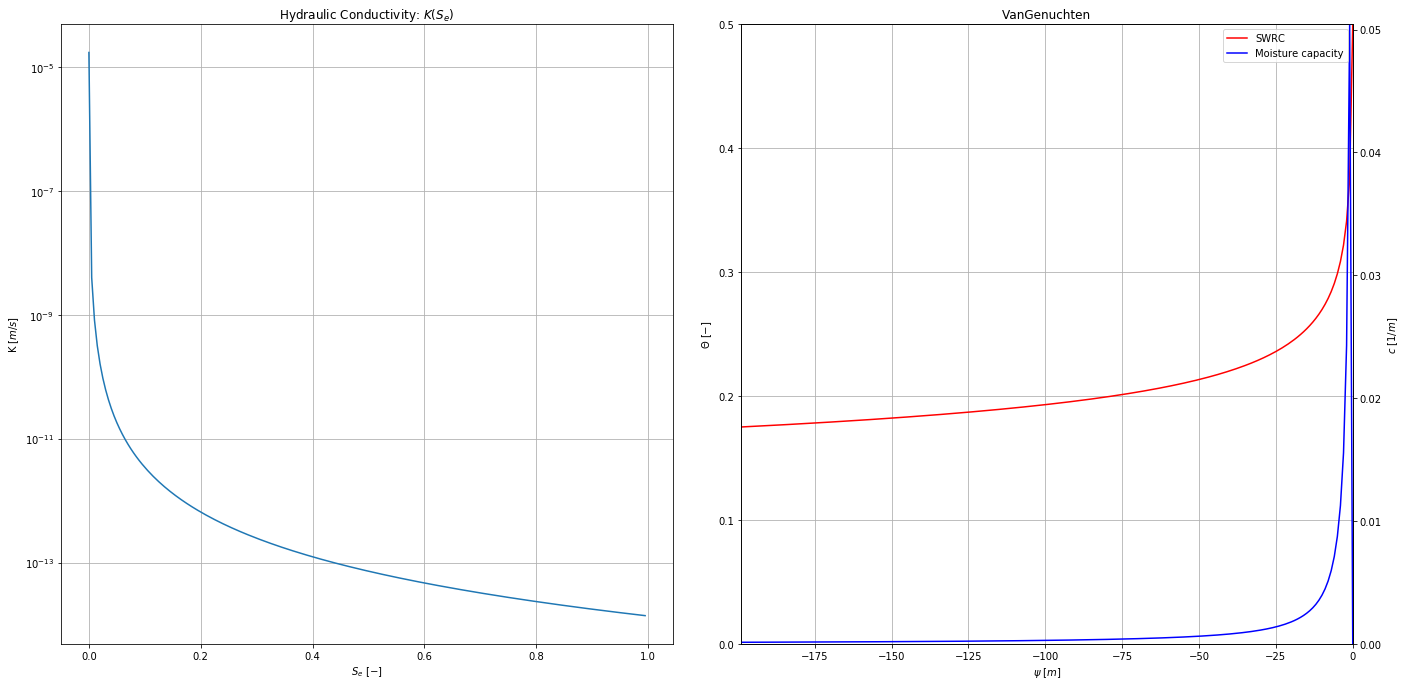

In [29]:
## Plot soil hydraulic parametrization

plt.figure(figsize=(20,10))

axk = plt.subplot2grid((4, 4), (0, 0), rowspan=4, colspan=2)
#axk.plot(soilPar['Se[-]'], soilPar['K[m/s]'])
axk.semilogy(soilPar['Se[-]'], soilPar['K[m/s]'])
axk.set_xlabel("$S_e$ [$-$]")
axk.set_ylabel("K [$m/s$]")
axk.set_title('Hydraulic Conductivity: $K(S_e)$')
axk.grid()

axt = plt.subplot2grid((4, 4), (0,2), rowspan=4, colspan=2)
par1 = axt.twinx()
axt.set_xlim(soilPar['Psi[m]'].min(),soilPar['Psi[m]'].max())
axt.set_ylim(0,soilPar['Theta[-]'].max())
par1.set_ylim(0,soilPar['dTheta[1/m]'].max())

Theta, = axt.plot(soilPar['Psi[m]'], soilPar['Theta[-]'], color='r', label='SWRC')
#Theta, = axt.semilogy(soilPar['Psi[m]'], soilPar['Theta[-]'], color='r', label='SWRC')
axt.grid()
axt.set_xlabel("$\psi$ [$m$]")
axt.set_ylabel("$\Theta$ [$-$]")
axt.set_title(soilModel)
axt.get_xticklabels()


dTheta, = par1.plot(soilPar['Psi[m]'], soilPar['dTheta[1/m]'],  color='b', label='Moisture capacity')
#dTheta, = par1.semilogy(soilPar['Psi[m]'], soilPar['dTheta[1/m]'],  color='b', label='Moisture capacity')
par1.set_ylabel("$c$ [$1/m$]")
plt.legend(handles=[Theta,dTheta], loc=0)
plt.rcParams.update({'font.size': 22})

plt.tight_layout()

## Initial condition

In [25]:
## Set the path of your input file folder
#inputFolderPath = ""
#os.chdir(inputFolderPath)

os.listdir()

['BottomBC.csv',
 'Hydraulic Parametrization.csv',
 'Hydraulic_Conductivity_with_some_theory.ipynb',
 'InitialConditionHydrostatic.csv',
 'InitialConditionHydrostaticPonding.csv',
 'Richards1DInput.ipynb',
 'SWRC_with_some_theory.ipynb',
 'TopBC.csv']

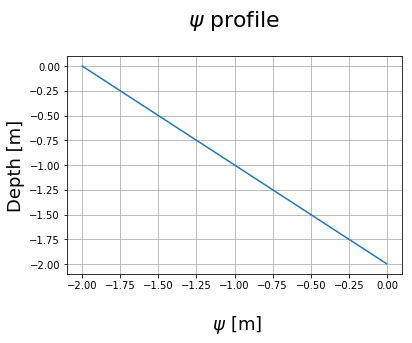

In [14]:
# Set the name of you initial condition input file
iCFileName = 'InitialConditionHydrostatic.csv'

iC = pd.read_csv(iCFileName)
#iC.info()
#iC.head()

depth = iC["Depth[m]"]
depth = -depth
iC["Depth[m]"] = depth.values
iC.columns = ["Depth[m]","Psi[m]"]
iC.head()

plt.plot(iC['Psi[m]'], iC['Depth[m]'], label = "Initial Condition $\psi$")
plt.xlabel("\n $\psi$ [m]",fontsize=18)
plt.ylabel("Depth [m]",fontsize=18)
plt.title("$\psi$ profile \n",fontsize=22)
plt.grid()
#plt.legend(loc='center left', bbox_to_anchor=(1,0.9))
plt.legend_ = None

##### Just a remark
The hydrostatic profile is the state of equilibrium since the flux is 
$$-K(\psi)\dfrac{\partial}{\partial z}(\psi+z)$$
in which $\psi+z= h$ is the total head.
With the hydrostatic distribution of $\psi$ $h$ is constant over the depth and hence the water flux is null and
$$\dfrac{\partial \theta}{\partial t} = 0$$

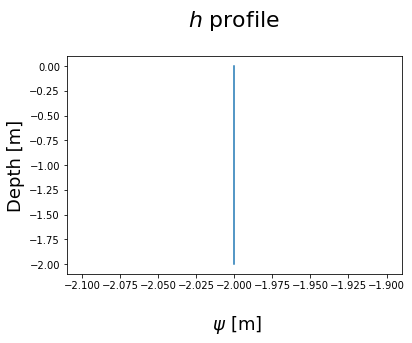

In [12]:
plt.plot(iC['Psi[m]']+ iC['Depth[m]'], iC['Depth[m]'], label = "Initial Condition $\psi$")
plt.xlabel("\n $\psi$ [m]",fontsize=18)
plt.ylabel("Depth [m]",fontsize=18)
plt.title("$h$ profile \n",fontsize=22)
plt.legend_ = None

## Boundary conditions

### Top boundary condition

_Precipitation fluxes_ during storm events and potential evapotranspiration during interstorm periods are the driving forces of catchment dynamics (Bixio et al., 2000)
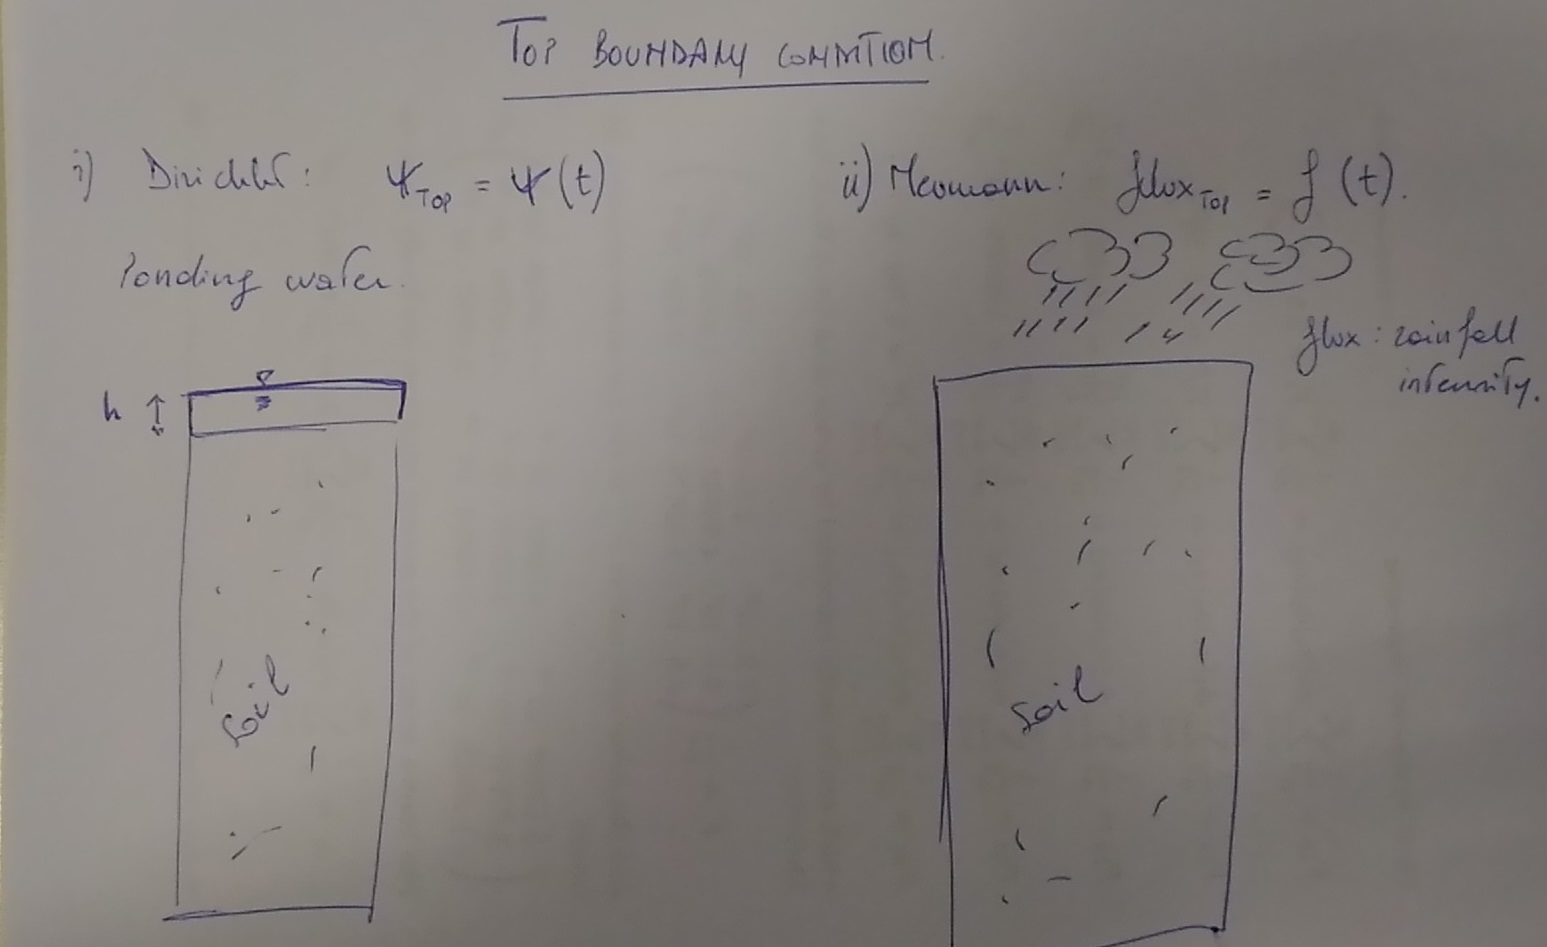
It is possible to choose between two differents boundary condition:
- Dirichlet: we prescribe the value of the unkonow over time
- Neumann: we prescribe the value of the flux over time.

The choice depends on the physic of what is happening. In the first case we use a Dirichlet boundary condition when there is water ponding, the second one when it is raining and the rainfall intensity is smaller of the hydraulic conductivity of the uppermost layer. Assigning the rigth boundary condition is a non trivial problem dealing with Richards equation, since it depends both on the atmospheric forcing and on the hydraulic condition of the uppermost layer of the soil.
Indeed, when rain and meltwater reach the surface of the ground the hydraulic characteristics of the uppermost layer of soil determine how much water infiltrates and how much becomes overland flow (Dunne, 1978).

Models presented in literature adopt different strategies to define the boundary condition at the soil surface: the code at run-time switch from a specified flux (Neumann) to a constant head (Dirichlet) condition, and vice versa (Bixio et al., 2000, Sulis et al., 2009). 

For this model, the boundary condition at the top of the soil column is always given by the rainfall intensity (Neumann type).
_This is one of the key feature of the algorithm implemented in the code_. Richards equation is simultaneously solved with the shallow water equation on the soil surface: so if it is no raining nothing will infiltrate, if the rainfall intensity is smaller than the hydraulic conductivity of the uppermost layer all infiltrates on the contrary some water infiltrates and the remaining ponds...but we do not have to switch to a Dirichlet boundary condition!!!
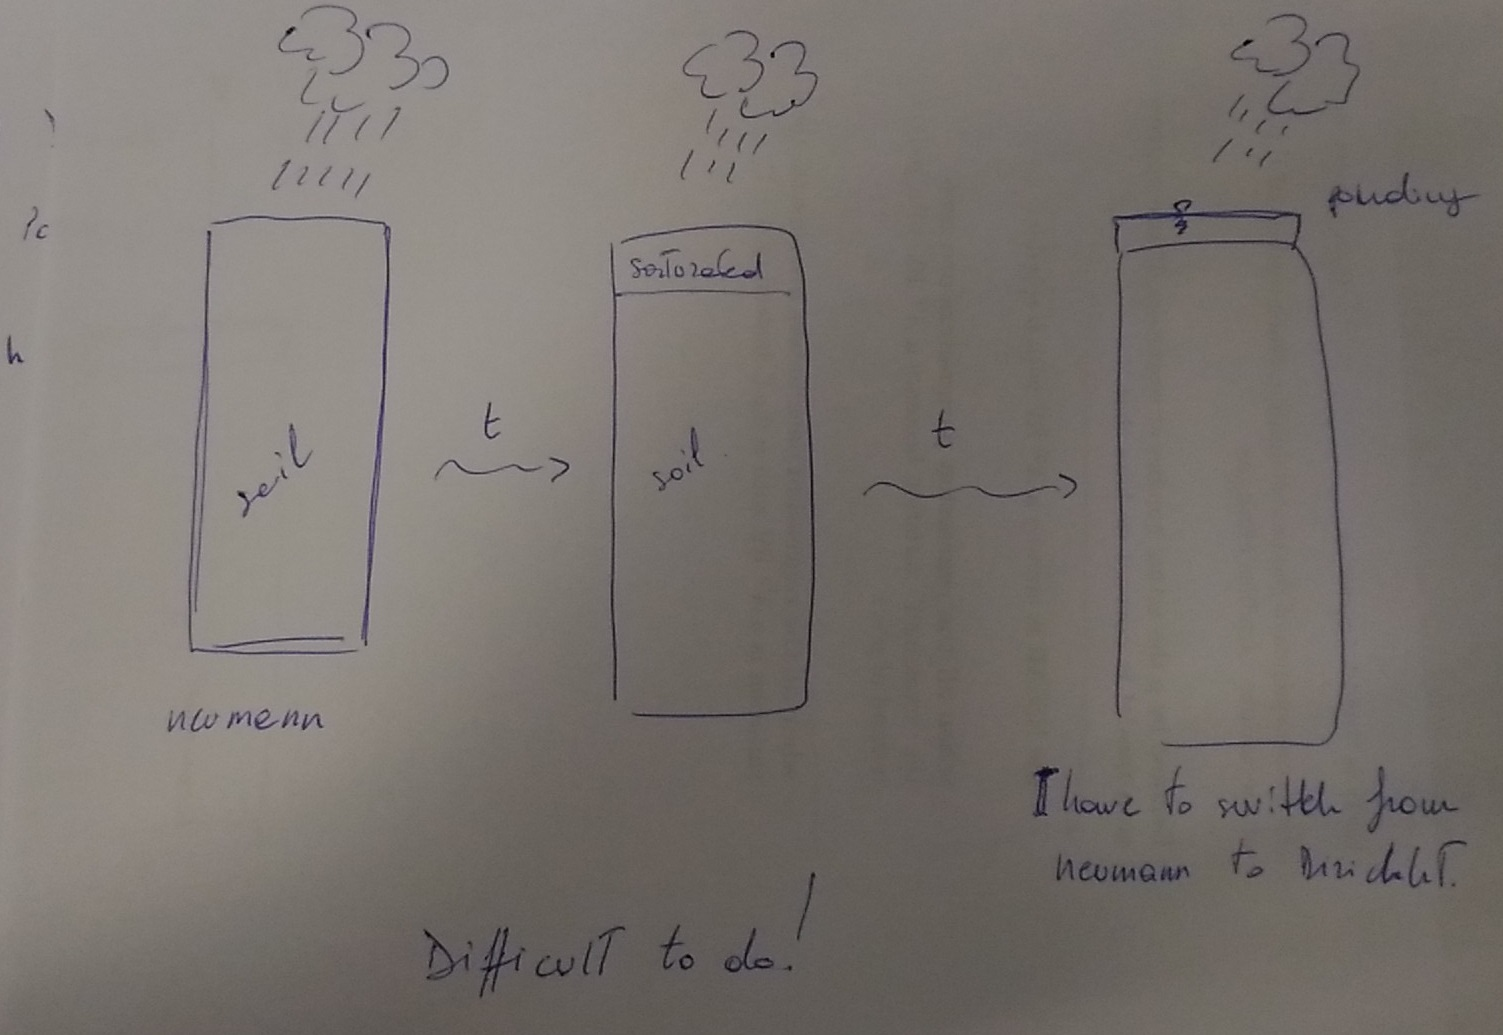

In [22]:
os.listdir()

['BottomBC.csv',
 'Hydraulic Parametrization.csv',
 'Hydraulic_Conductivity_with_some_theory.ipynb',
 'InitialConditionHydrostatic.csv',
 'InitialConditionHydrostaticPonding.csv',
 'Richards1DInput.ipynb',
 'SWRC_with_some_theory.ipynb',
 'TopBC.csv']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21313 entries, 0 to 21312
Data columns (total 3 columns):
Format              0 non-null float64
yyyy-MM-dd HH:mm    21313 non-null object
Unnamed: 2          21313 non-null float64
dtypes: float64(2), object(1)
memory usage: 499.6+ KB


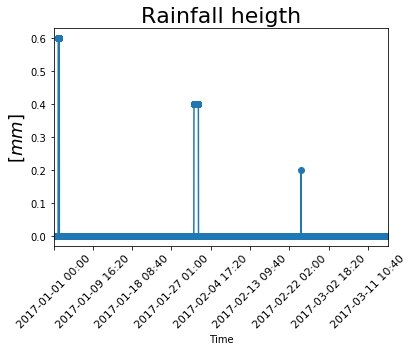

In [23]:
# Set the name of you top boundary condition input file
topBCFileName = 'TopBC.csv'

topBC = pd.read_csv(topBCFileName, skiprows=6)
topBC.info()
topBC.head()

del topBC["Format"]
map(datetime,topBC["yyyy-MM-dd HH:mm"])
topBC.columns = ["Time","Psi"]
topBC=topBC.set_index("Time")

t = topBC.plot(style='-o')
t.set_ylabel("[$mm$]",fontsize=18)
t.set_title("Rainfall heigth",fontsize=22)
t.legend_.remove()
labels = t.get_xticklabels()
for label in labels:
    label.set_rotation(45)
    label.set_fontsize(11)

### Bottom boundary condition

At the bottom of the soil column it is possible to assign four different boundary conditions. Again the choice has to be consisten with the physic of the problem.
- Dirichlet: we prescribe $\psi$ over time. In this case we have to make some assumptions on the water table depth. Let us assume that the water table is at the bottom of the soil column we have to impose $\psi=0$ by definition of water table. Of course it is possible to imagine that water table can moves up or down and this will change the value of $\psi$ at the bottom.???
- Neumann: we prescribe the flux through the boundary over time. We may  pump water or pumping from a well
- Free drainge: is some how similar to a Neumann boundary condition since is condition applied to the water flux bu here we do not have to assign any value. As a matter of fact, the water flux is due only to the gradient of the gravitational field. To better clarify this boundary condition let us look at the formula of the water flux:$$-K(\psi)\left(\dfrac{\partial \psi}{\partial z} + 1\right)$$. Assigning free drainage boundary condition we have$$-K(\psi)\left( + 1\right)$$.
- Impervious bottom: the bottom is impervious so there is no water flux through the boundary.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 3 columns):
Format              0 non-null float64
yyyy-MM-dd HH:mm    41180 non-null object
Unnamed: 2          41180 non-null float64
dtypes: float64(2), object(1)
memory usage: 965.2+ KB


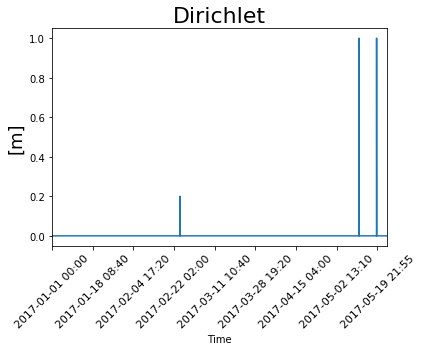

In [24]:
# Set the name of you bottom boundary condition input file
bottomBCFileName = 'BottomBC.csv'

bottomBC = pd.read_csv(bottomBCFileName, skiprows=6)
bottomBC.info()
bottomBC.head()

del bottomBC["Format"]
map(datetime,bottomBC["yyyy-MM-dd HH:mm"])
bottomBC.columns = ["Time","Psi"]
bottomBC = bottomBC.set_index("Time")

b = bottomBC.plot(style='-')
## Dirichlet boundary condition
b.set_ylabel("[m]",fontsize=18)
b.set_title("Dirichlet",fontsize=22)
## Neumann boundary condition
#b.set_ylabel("[m/s]",fontsize=18)
#t.set_title("Neumann",fontsize=22)
b.legend_.remove()
labels = b.get_xticklabels()
for label in labels:
    label.set_rotation(45)
    label.set_fontsize(11)

##### ...just a little note
Even though running Richards.sim requires always an input file for the bottom boundary condition, only the (DBC) needs of it.
Indeed, the free drainage condition computes the water flux through the domain bottom as a result of just the gravitational gradient, whilst the impervious bottom condition foresees that there is no water flux at all. 
Therefore the above plot makes sense only when a (DBC) is prescribed. Assigning a (DBC) at the bottom one makes an assumption on the time evolution of the water table depth.